# Projeto 6 - Previsão de Sobrevivência no Titanic

O conjunto de dados lista informações sobre os passageiros do Titanic. 

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipos de pessoas tinham maior probabilidade de sobreviver?" usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

Objetivo: Analisar os dados, construir gráficos e fazer uma previsão de que tipos de pessoas tinham maior probabilidade de sobreviver usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.) utilizando linguagem Python.

Fonte do dataset: https://www.kaggle.com/datasets/vinicius150987/titanic3

In [1]:
#Versão da Linguagem Python
from platform import python_version
print("Versão python utilizada neste projeto: ", python_version())

Versão python utilizada neste projeto:  3.9.13


In [2]:
#Instala o pacote watermark. 
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# importar bibliotecas do modelo de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
seaborn   : 0.11.2
pandas    : 1.4.4
matplotlib: 3.5.2



Carregando o Dataset

In [6]:
#Carregando o  dataset
df = pd.read_csv('titanic3.csv')

In [7]:
# Verificando o tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [8]:
#Verificando quantas linhas e colunas tem o dataset
df.shape

(1309, 14)

In [9]:
#Total de registros considerando cada coluna
df.size

18326

In [10]:
#Verifica os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [11]:
#Amostra das 5 primeiras linhas
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
#Amostra das 5 últimas linhas
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


1. Survived (Sobreviveu): 0 = Não, 1 = Sim
2. Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
3. Sex (Sexo): Sexo do passageiro
4. Age (Idade): Idade em anos
5. Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
6. Parch: Quantidade de pais / crianças a bordo do Titanic
7. Ticket (Bilhete): Número do bilhete de embarque
8. Fare (Tarifa): Tarifa paga pelo Passageiro
9. Cabin (Cabine): Número de cabine
10. Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q=Queenstown, S = Southampton)

In [13]:
#Colunas dos conjunto de dados
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [14]:
#Método value_counts() para cada tipo de dado
df.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

In [15]:
#Verificando o tipo de dado de cada coluna
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [16]:
#Verificando se há registros duplicados
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [17]:
#Verificando se há valores ausentes
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [18]:
#Calculando a mediana da coluna 'Age' e inserindo nos valores ausentes dessa coluna
age_median = df['age'].median()
df['age'].fillna(age_median, inplace=True)

In [19]:
#Calculando a mediana da coluna 'Fare' e inserindo nos valores ausentes dessa coluna
fare_median = df['fare'].median()
df['fare'].fillna(fare_median, inplace=True)

In [20]:
#Excluindo linhas com valores ausentes na coluna 'embarked'
df = df.dropna(subset=['embarked'])

In [21]:
#Excluindo algumas variáveis por não serem relevantes para o estudo
df.drop(['name', 'ticket', 'cabin','boat', 'body', 'home.dest'], axis=1, inplace=True)

In [22]:
#Verificando se há valores ausentes
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [23]:
#Verificando o Dataset
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [24]:
#Verificando as estatísticas das variáveis numéricas
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,29.471818,0.499617,0.385616,33.209595
std,0.836942,0.485825,12.881598,1.042273,0.866092,51.748768
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [25]:
#Algumas informações para colunas não-numéricas
df.describe(include=['O'])

,sex,embarked
count,1307,1307
unique,2,3
top,male,S
freq,843,914


In [26]:
#Calculando as quantidades da coluna 'embarked'
df_porto = df['embarked'].value_counts()
print(df_porto)

S    914
C    270
Q    123
Name: embarked, dtype: int64


Perguntas

1- Qual foi a porcentagem dos passageiros sobreviventes?

In [27]:
#Filtrando pela coluna survived e calculando as quantidades
df_survived = df['survived'].value_counts()
print(df_survived)

0    809
1    498
Name: survived, dtype: int64


In [28]:
#Calculando o total de passageiros
df_total = df_survived.sum()
print(df_total)

1307


In [29]:
#Calculando as porcentagens dos sobreviventes e não sobreviventes
df_porcentagem = (df_survived / df_total) * 100
print(df_porcentagem)

0    61.897475
1    38.102525
Name: survived, dtype: float64


In [30]:
#Arredondando as porcentagens para 2 casas decimais
df_porcentagem.round(2)

0    61.9
1    38.1
Name: survived, dtype: float64

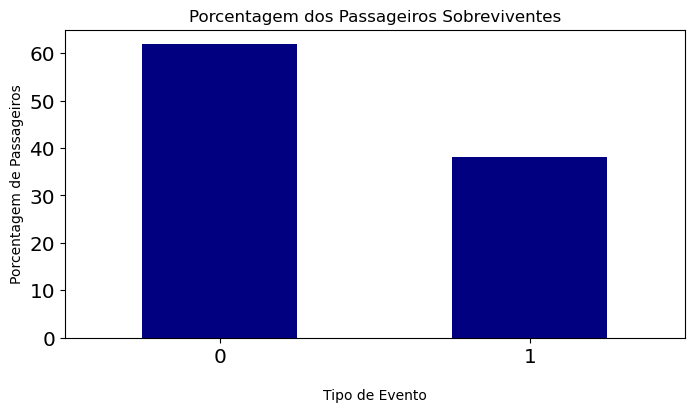

In [31]:
#Gráfico com matplotlib
df_porcentagem.plot(kind = 'bar', 
                title = 'Porcentagem dos Passageiros Sobreviventes',
                ylabel = 'Porcentagem de Passageiros', 
                xlabel = '\nTipo de Evento',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

In [32]:
#Destacando a porcentagem dos passageiros sobreviventes
print('A porcentagem dos passageiros sobreviventes é: ', df_porcentagem.round(2)[1])

A porcentagem dos passageiros sobreviventes é:  38.1


2 - Qual foi a porcentagem dos passageiros sobreviventes por sexo?

In [33]:
#Calculando o total de passageiros por sexo e verificando suas quantidades
total_por_sexo = df['sex'].value_counts()
print(total_por_sexo)

male      843
female    464
Name: sex, dtype: int64


In [34]:
#Calculando o total de passageiros sobreviventes por sexo e verificando suas quantidades
sobreviventes_por_sexo = df[df['survived'] == 1]['sex'].value_counts()
print(sobreviventes_por_sexo)

female    337
male      161
Name: sex, dtype: int64


In [35]:
#Calculando a porcentagem de passageiros sobreviventes por sexo
porcentagem_sobreviventes_por_sexo = (sobreviventes_por_sexo / total_por_sexo) * 100


In [36]:
#Verificando o resultado
print("Porcentagem de passageiros sobreviventes por sexo:")
print(porcentagem_sobreviventes_por_sexo.round(2))

Porcentagem de passageiros sobreviventes por sexo:
female    72.63
male      19.10
Name: sex, dtype: float64


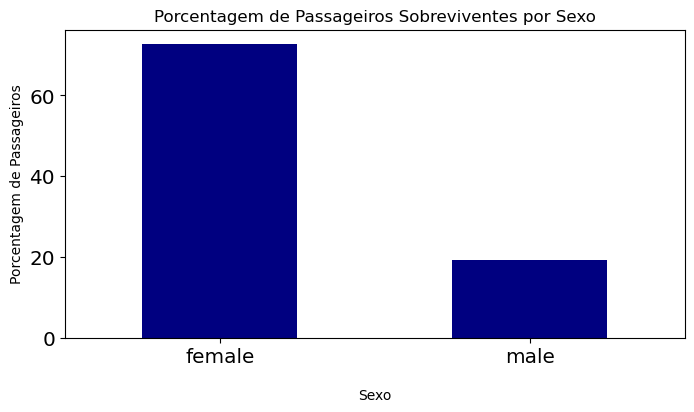

In [37]:
#Gráfico com matplotlib
porcentagem_sobreviventes_por_sexo.plot(kind = 'bar', 
                title = 'Porcentagem de Passageiros Sobreviventes por Sexo',
                ylabel = 'Porcentagem de Passageiros', 
                xlabel = '\nSexo',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

3- Qual a correlação entre as variáveis?

<AxesSubplot:>

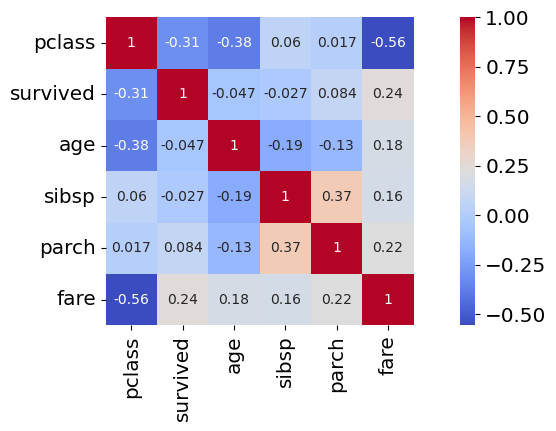

In [38]:
#Plotando um mapa de calor (heatmap) para as variáveis numéricas
sns.heatmap(df.corr(), cmap='coolwarm', square=True, linecolor='white', annot=True)

4- Qual era a faixa etária dos passageiros que estavam no Titanic?

In [39]:
#Verificando a distribuição da coluna 'age'
distribuicao_idade = df['age'].describe()

In [40]:
#Visualizando o resultado
print(f"Faixa etária dos passageiros no Titanic:")
print(f"Mínimo: {distribuicao_idade['min']}")
print(f"Máximo: {distribuicao_idade['max']}")
print(f"Média: {distribuicao_idade['mean']}")
print(f"Mediana: {distribuicao_idade['50%']}")

Faixa etária dos passageiros no Titanic:
Mínimo: 0.1667
Máximo: 80.0
Média: 29.47181843917368
Mediana: 28.0


5- A partir desta faixa etária, mais crianças ou mais adultos sobreviveram? Considerar crianças como aqueles com idade inferior a 18 anos e adultos como aqueles com 18 anos ou mais.

In [41]:
#Definindo critérios para classificar crianças e adultos
crianca = 18

In [42]:
#Criando uma coluna indicando se é criança ou adulto
df['idade'] = df['age'].apply(lambda age: 'crianca' if age < crianca else 'adulto')

In [43]:
#Calculando o número de sobreviventes por categoria
sobreviventes = df[df['survived'] == 1]['idade'].value_counts()

In [44]:
#Visualizando o resultado
print("Número de sobreviventes:")
print(sobreviventes)

Número de sobreviventes:
adulto     417
crianca     81
Name: idade, dtype: int64


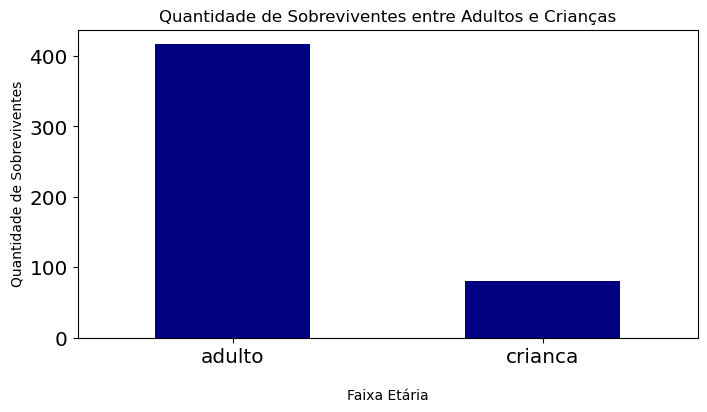

In [45]:
#Gráfico com matplotlib
sobreviventes.plot(kind = 'bar', 
                title = 'Quantidade de Sobreviventes entre Adultos e Crianças',
                ylabel = 'Quantidade de Sobreviventes', 
                xlabel = '\nFaixa Etária',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

Preparando as variáveis para o modelo de Machine Learning. O modelo só aceita valores numéricos.

In [46]:
#Selecionando as variáveis dependentes e o target
var_depen = ['age', 'fare', 'sex', 'pclass', 'embarked']
target = 'survived'

In [47]:
#Tratando valores ausentes
df = df[var_depen + [target]].dropna()

In [48]:
#Convertendo algumas variáveis categóricas em numéricas
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Modelo de Regressão Logística

In [49]:
#Dividindo o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[var_depen], df[target], test_size=0.2, random_state=42)

In [50]:
#Verificando a quantidade de registros para cada dado de treino e teste
print(("Total de X_treino: %i, Total de X_teste: %i, Total de y_treino: %i, Total de y_teste: %i") % (len(X_train),
                                                                                                      len(X_test),
                                                                                                      len(y_train),
                                                                                                      len(y_test)))

Total de X_treino: 1045, Total de X_teste: 262, Total de y_treino: 1045, Total de y_teste: 262


In [51]:
#Criando o modelo de Regressão Logística
model = LogisticRegression()

In [52]:
#Treinando o modelo
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
#Fazendo previsões
y_pred = model.predict(X_test)

In [54]:
#Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.7748091603053435


Modelo de Árvore de Decisão

In [55]:
#Dividindo o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[var_depen], df[target], test_size=0.2, random_state=42)

In [56]:
#Criando o modelo de Árvore de Decisão
model = DecisionTreeClassifier()

In [57]:
#Treinando o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
#Fazendo previsões
y_pred = model.predict(X_test)

In [59]:
#Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.7404580152671756


In [60]:
#Obtendo a importância das variáveis dependentes
importancia = model.feature_importances_

In [61]:
# Criar um dataframe com as importâncias das variáveis
variaveis_importantes = pd.DataFrame({'Variável': var_depen, 'Importancia': importancia})
variaveis_importantes = variaveis_importantes.sort_values(by='Importancia', ascending=False)

In [62]:
#Visualizando as variáveis mais importantes
print("Variáveis mais importantes:")
print(variaveis_importantes)

Variáveis mais importantes:
   Variável  Importancia
2       sex     0.318689
1      fare     0.284835
0       age     0.240907
3    pclass     0.126498
4  embarked     0.029071
